In [26]:
# load libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor


In [27]:
# Load the dataset
df = pd.read_csv('walmart.csv')
df.head()


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [28]:
# Basic data inspection
print(df.info())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB
None


,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [29]:

# Check for missing values
print(df.isnull().sum())

# Handle missing values if any
df.fillna(method='ffill', inplace=True)  


# Convert 'Date' column to datetime with the correct format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Extract time features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.isocalendar().week


Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_12620\3260376222.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


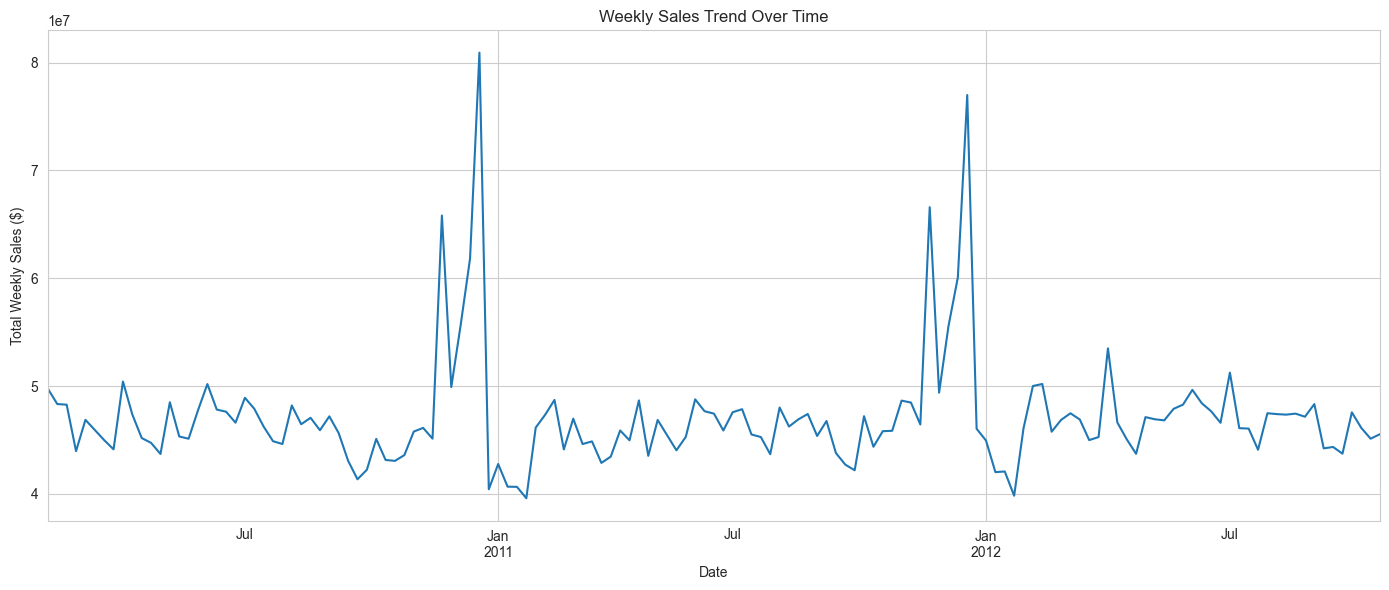

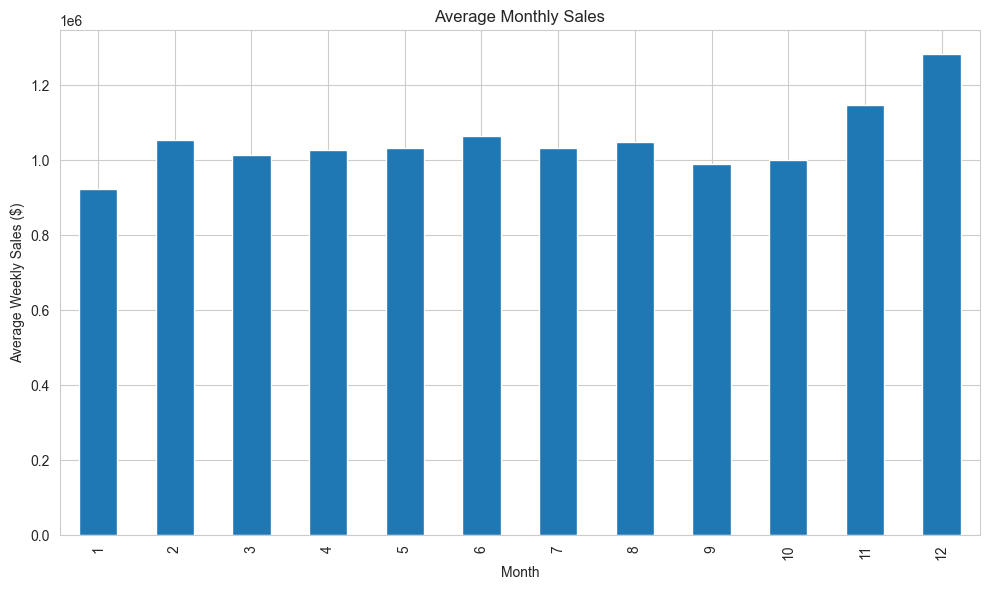

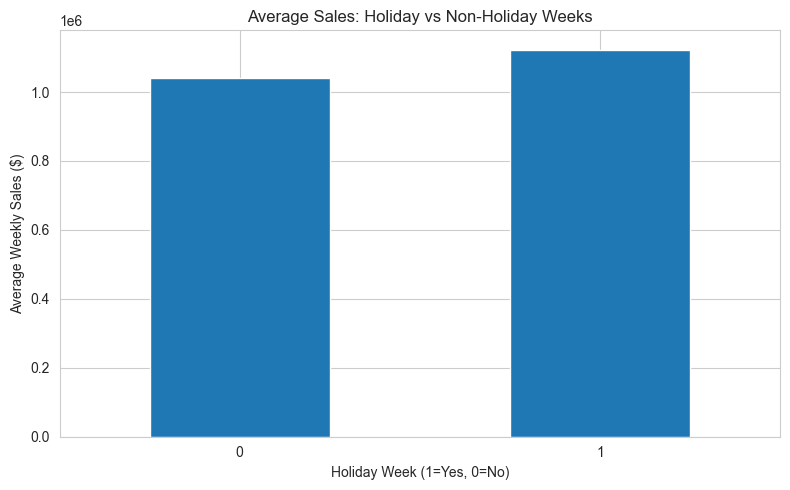

In [30]:
# Set style
sns.set_style('whitegrid')

# 1. Sales Trend Analysis
plt.figure(figsize=(14, 6))
df.groupby('Date')['Weekly_Sales'].sum().plot()
plt.title('Weekly Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Total Weekly Sales ($)')
plt.tight_layout()
plt.show()

# 2. Sales by Month
plt.figure(figsize=(10, 6))
df.groupby('Month')['Weekly_Sales'].mean().plot(kind='bar')
plt.title('Average Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Average Weekly Sales ($)')
plt.tight_layout()
plt.show()

# 3. Holiday vs Non-Holiday Sales
holiday_sales = df.groupby('Holiday_Flag')['Weekly_Sales'].mean()
plt.figure(figsize=(8, 5))
holiday_sales.plot(kind='bar')
plt.title('Average Sales: Holiday vs Non-Holiday Weeks')
plt.xlabel('Holiday Week (1=Yes, 0=No)')
plt.ylabel('Average Weekly Sales ($)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

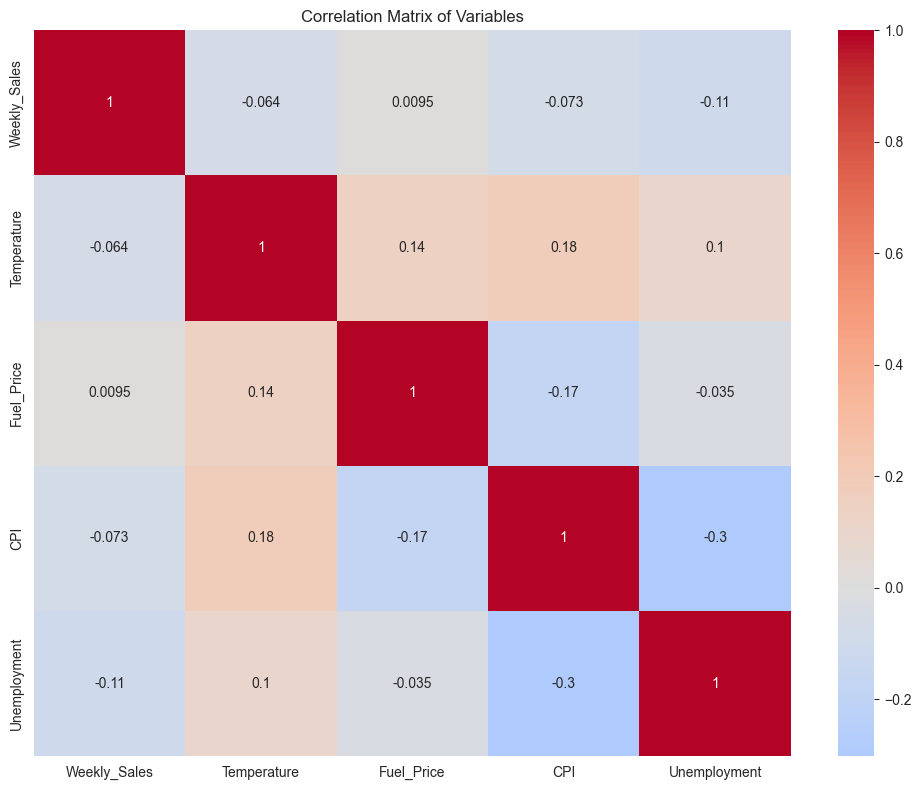

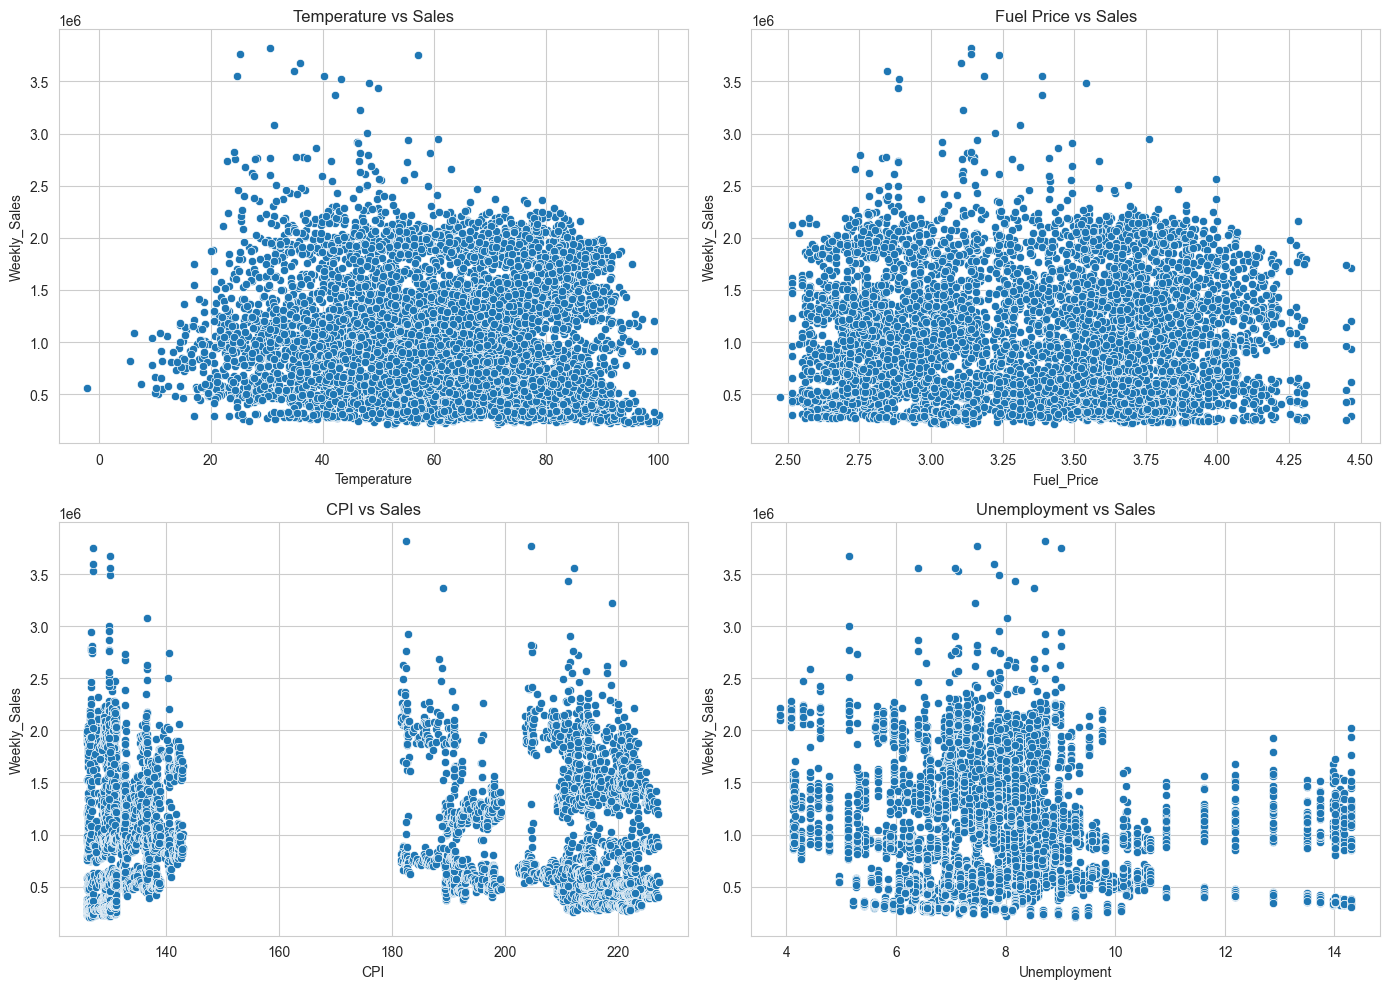

Unemployment vs Sales - Pearson Correlation: -0.106, p-value: 0.0000


In [31]:

# Correlation matrix
corr_matrix = df[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Variables')
plt.tight_layout()
plt.show()

# Scatter plots for key variables
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

sns.scatterplot(ax=axes[0, 0], data=df, x='Temperature', y='Weekly_Sales')
axes[0, 0].set_title('Temperature vs Sales')

sns.scatterplot(ax=axes[0, 1], data=df, x='Fuel_Price', y='Weekly_Sales')
axes[0, 1].set_title('Fuel Price vs Sales')

sns.scatterplot(ax=axes[1, 0], data=df, x='CPI', y='Weekly_Sales')
axes[1, 0].set_title('CPI vs Sales')

sns.scatterplot(ax=axes[1, 1], data=df, x='Unemployment', y='Weekly_Sales')
axes[1, 1].set_title('Unemployment vs Sales')

plt.tight_layout()
plt.show()

# Statistical testing
pearson_coef, p_value = stats.pearsonr(df['Unemployment'], df['Weekly_Sales'])
print(f"Unemployment vs Sales - Pearson Correlation: {pearson_coef:.3f}, p-value: {p_value:.4f}")

                            OLS Regression Results                            
Dep. Variable:           Weekly_Sales   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     33.57
Date:                Tue, 25 Mar 2025   Prob (F-statistic):           5.93e-34
Time:                        14:25:15   Log-Likelihood:                -94269.
No. Observations:                6435   AIC:                         1.886e+05
Df Residuals:                    6429   BIC:                         1.886e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.727e+06   7.98e+04     21.646   

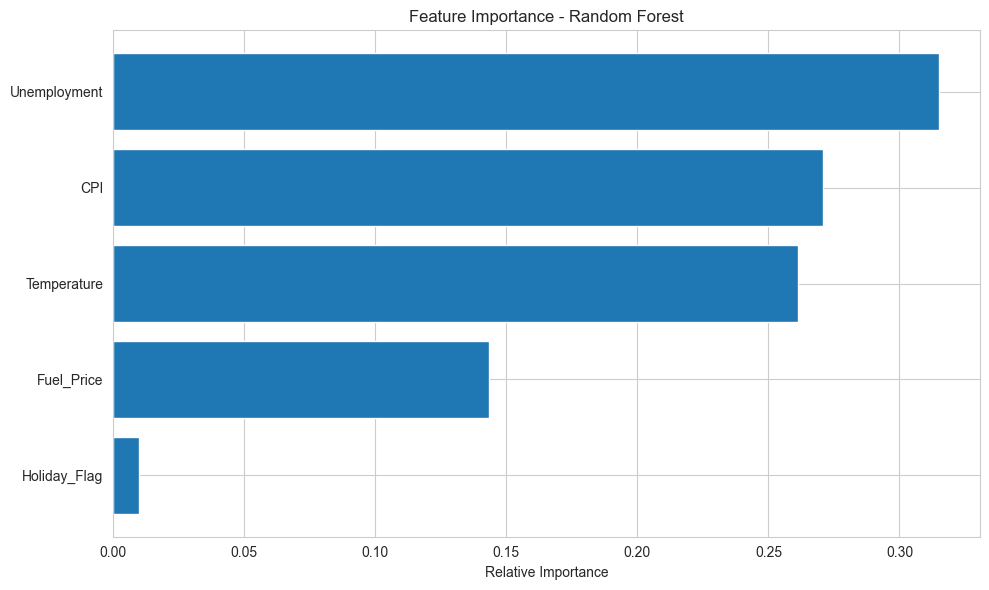

In [33]:

# Multiple Regression Analysis
X = df[['Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']]
y = df['Weekly_Sales']

X = sm.add_constant(X)  
model = sm.OLS(y, X).fit()
print(model.summary())

# Feature Importance with Random Forest
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train.drop('const', axis=1), y_train)

# Plot feature importance
features = X_train.drop('const', axis=1).columns
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10, 6))
plt.title('Feature Importance - Random Forest')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.tight_layout()
plt.show()